In [1]:
import os

In [2]:
import numpy as np

In [3]:
%reload_ext importnb
import GANstructure

Using TensorFlow backend.


In [4]:
path='../data/camel/full_numpy_bitmap_camel.npy'

In [5]:
RUN_FOLDER='run/'
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))

In [27]:
def loader(path):
    dataset_size=5000
    dataset=np.load(path)
    no_of_images=dataset.shape[0]
    dataset=dataset.reshape(no_of_images,28,28)
    dataset=dataset[:dataset_size]
    dataset = dataset.astype('float32') / 255.0
    '''
    test 1
    arr = np.arange(10)
    np.random.shuffle(arr)
    print(arr)
    '''
    np.random.shuffle(dataset)
   
    return dataset

In [25]:
x=loader(path)


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

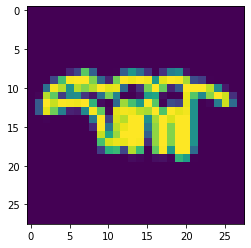

In [26]:
plt.imshow(x[50])
plt.show()

In [21]:
dataset1=np.load(path)

In [39]:
dataset1.shape

(121399, 784)

In [37]:
dataset1[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 108,
        45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       122, 255, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  81, 207, 238, 153,   6,   0,   0,   0,   0,
         0,   0, 141, 255, 175,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  89, 255, 209, 155, 253, 181,   2,   0,
         0,   0,   0,   0, 158, 255, 179,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 236, 191,   2,   0, 110, 255,
        49,   0,   0,   0,   0,   0, 213, 255, 125,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 118, 254,  41,   

In [33]:
a=dataset1[50].reshape(28,28)
a.shape

(28, 28)

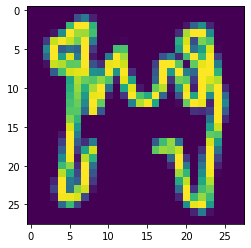

In [34]:
plt.imshow(a)
plt.show()


(3,)

In [6]:
mydata=np.load(path1)

In [7]:
mydata.shape

(121399, 784)

In [18]:
mydata.shape

(5000, 28, 28)

In [ ]:
split=4000
x_train=
    
    

In [ ]:
camel

In [ ]:
mydata.shape

In [ ]:
mmm=mydata[1].reshape(28,28,1)

In [ ]:
mmm.squeeze

In [ ]:
plt.imshow(np.squeeze(mmm))
plt.show()

In [ ]:
mydata.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
for camels in mydata:
    np.reshape(camels,(28,28,1))
    